In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
df = pd.read_csv('Spam Email Detection - spam.csv') 

In [4]:
# 'v2' contains the email subjects and'v1' contains the labels ('spam' or 'ham')
X = df['v2']
y = df['v1']

In [5]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [6]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [7]:
# Convert labels to binary: 'spam' -> 1, 'ham' -> 0
y = y.map({'spam': 1, 'ham': 0})

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature extraction using TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [9]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [10]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.9668161434977578
Confusion Matrix:
 [[965   0]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



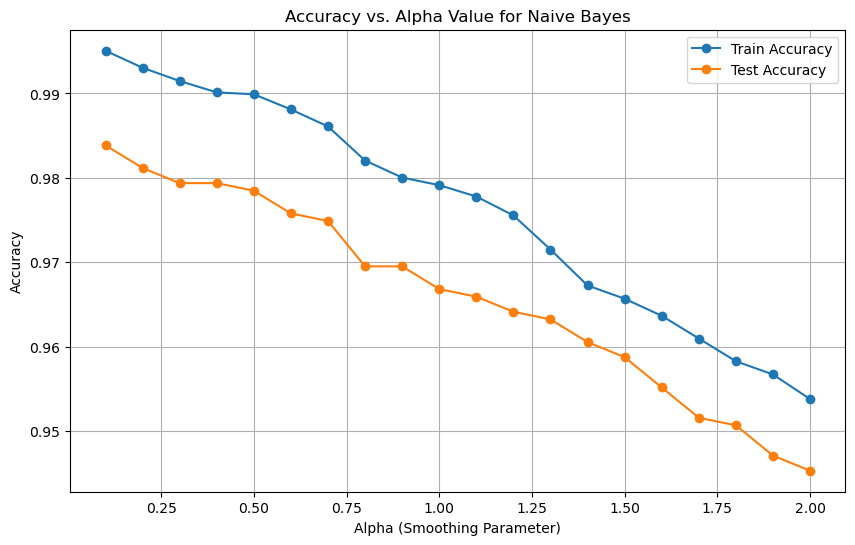

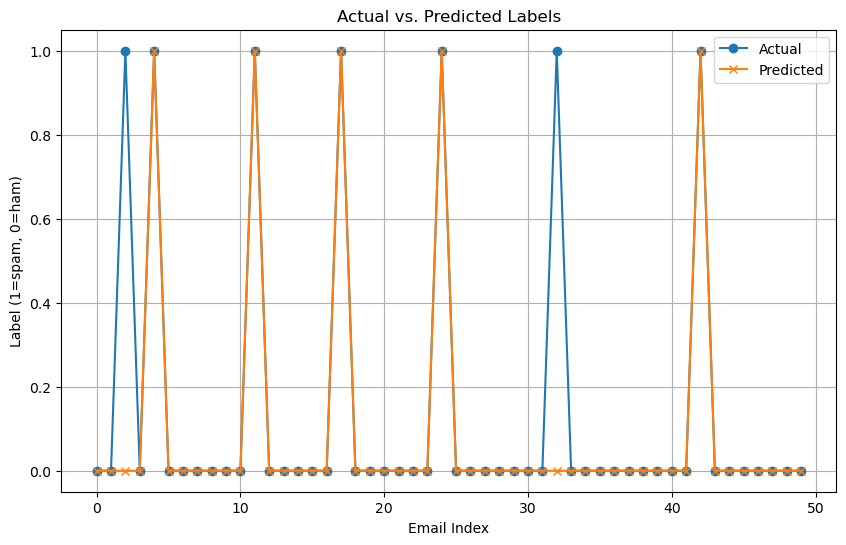

In [12]:
# Plot accuracy curve
train_accuracy = []
test_accuracy = []
alpha_values = np.linspace(0.1, 2.0, num=20)  # Vary alpha from 0.1 to 2.0
for alpha in alpha_values:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_tfidf, y_train)
    train_accuracy.append(model.score(X_train_tfidf, y_train))
    test_accuracy.append(model.score(X_test_tfidf, y_test))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(alpha_values, test_accuracy, label='Test Accuracy', marker='o')
plt.title('Accuracy vs. Alpha Value for Naive Bayes')
plt.xlabel('Alpha (Smoothing Parameter)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot prediction graph (1 = spam, 0 = ham)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title('Actual vs. Predicted Labels')
plt.xlabel('Email Index')
plt.ylabel('Label (1=spam, 0=ham)')
plt.legend()
plt.grid()
plt.show()